In [1]:
import requests, pandas as pd, numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from scipy import stats
import matplotlib.patches as mpatches
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error
from matplotlib.animation import FuncAnimation
from matplotlib import rc

In [2]:
household_type = pd.read_excel("raw_data.xlsx",sheet_name="T1",header=10,nrows=9)
household_occupier_type = pd.read_excel("raw_data.xlsx",sheet_name="T2",header=10,nrows=25)
household_size = pd.read_excel("raw_data.xlsx",sheet_name="T3",header=9,nrows=16)
household_type_tenancy = pd.read_excel("raw_data.xlsx",sheet_name="T4",header=9,nrows=12)
household_child = pd.read_excel("raw_data.xlsx",sheet_name="T5",header=10,nrows=11)

In [3]:
household_type = household_type.drop(axis=0,index=[0,1])
household_type = household_type.drop(columns="1980")
household_type

,Data Series,2022,2021,2020,2019,2018,2017,2016,2015,2014,...,1992,1991,1990,1989,1988,1987,1986,1985,1984,1983
2,HDB 1- And 2-Room Flats,94200,92400,88800,85700,81400,75400,74100,68800,64000,...,58900,55600,53900,58100,64400,69100,87200,99900,106900,100900
3,HDB 3-Room Flats,241400,242800,242400,240000,233900,229100,230300,223400,220100,...,251300,257300,233900,264400,244300,228400,224800,228700,206600,190000
4,HDB 4-Room Flats,438800,437700,434300,436500,420800,409900,407400,392300,386000,...,201700,188300,181500,161800,159900,145800,119200,81200,61400,53200
5,HDB 5-Room And Executive Flats,315600,316200,314600,317000,307200,302900,298600,295800,292800,...,94900,88700,86100,69900,65900,59000,48200,34300,32900,28400
6,Condominiums And Other Apartments,237500,229100,220100,222000,210300,201700,182400,170800,161800,...,32400,30800,30800,24500,25500,21500,18700,15000,15800,14300
7,Landed Properties,68200,68500,68400,69000,67900,66500,66200,69200,69400,...,49700,49800,46300,44800,38400,34300,40500,44000,44500,41500
8,Other Types Of Dwelling,3900,3900,3900,2200,3800,3100,3500,4200,3600,...,12800,12500,22200,18800,17900,29100,36400,44400,53700,70600


In [4]:
selected_household_type = household_type.melt(id_vars=["Data Series"],
            value_vars=[str(i) for i in range(1983,2023)])
selected_household_type = selected_household_type.rename(columns={"Data Series":"Type of Household",
                                                                  "variable":"year", "value":"noHouseholds"})

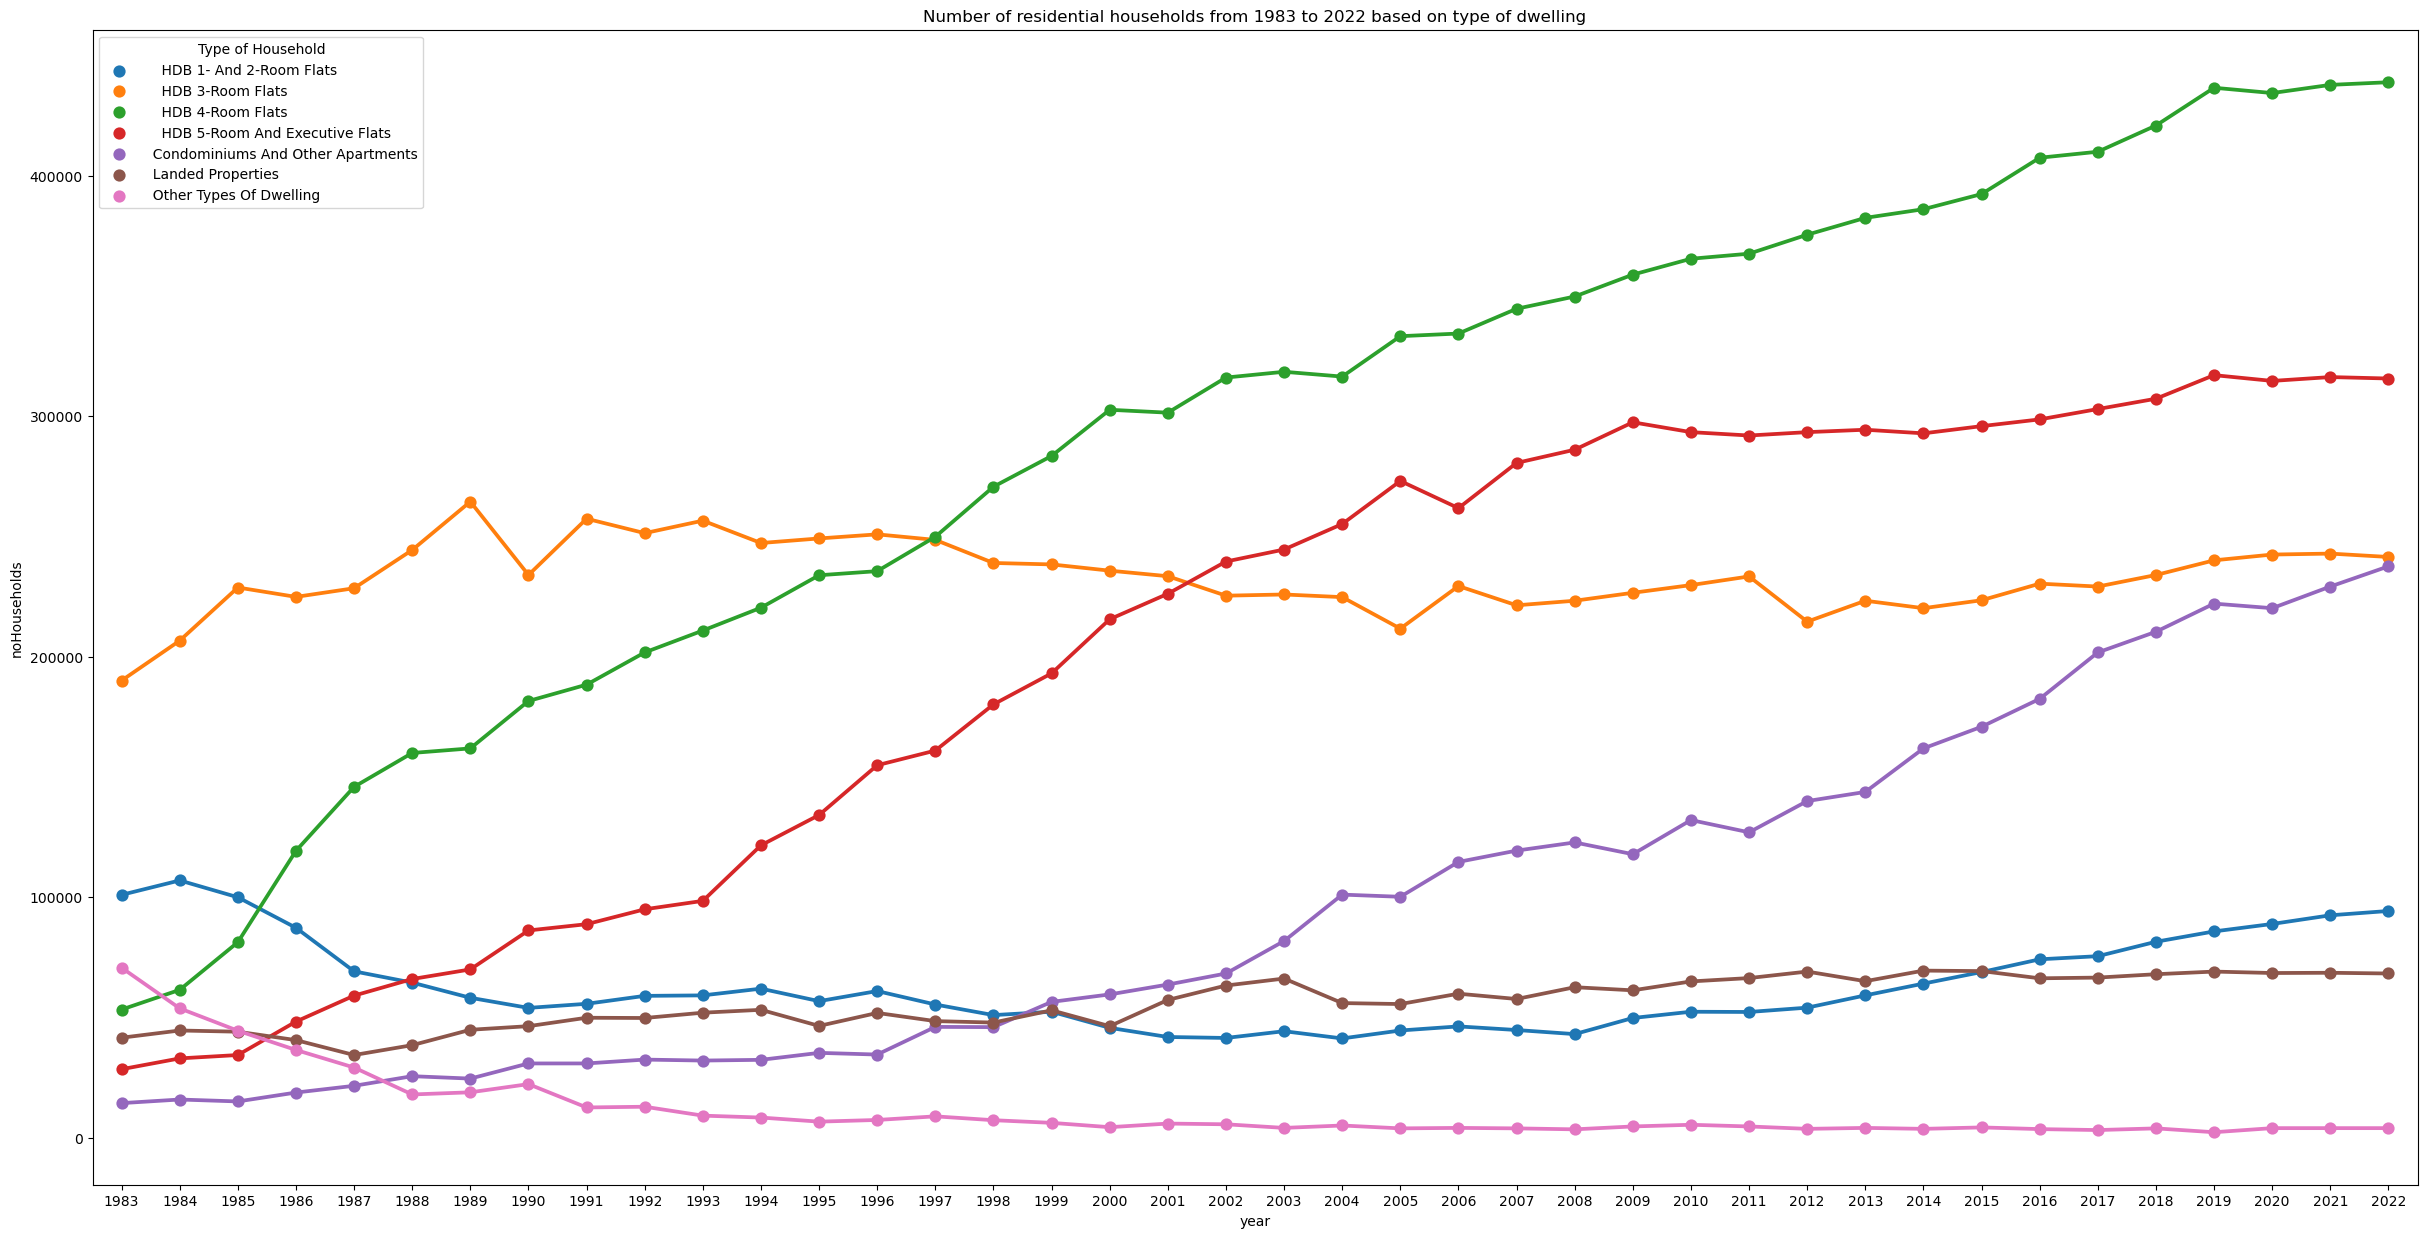

In [5]:
plt.figure(figsize=(30,15))
plt.title("Number of residential households from 1983 to 2022 based on type of dwelling")
sns.pointplot(y=selected_household_type["noHouseholds"],x=selected_household_type["year"],data=selected_household_type,hue="Type of Household")
plt.show()

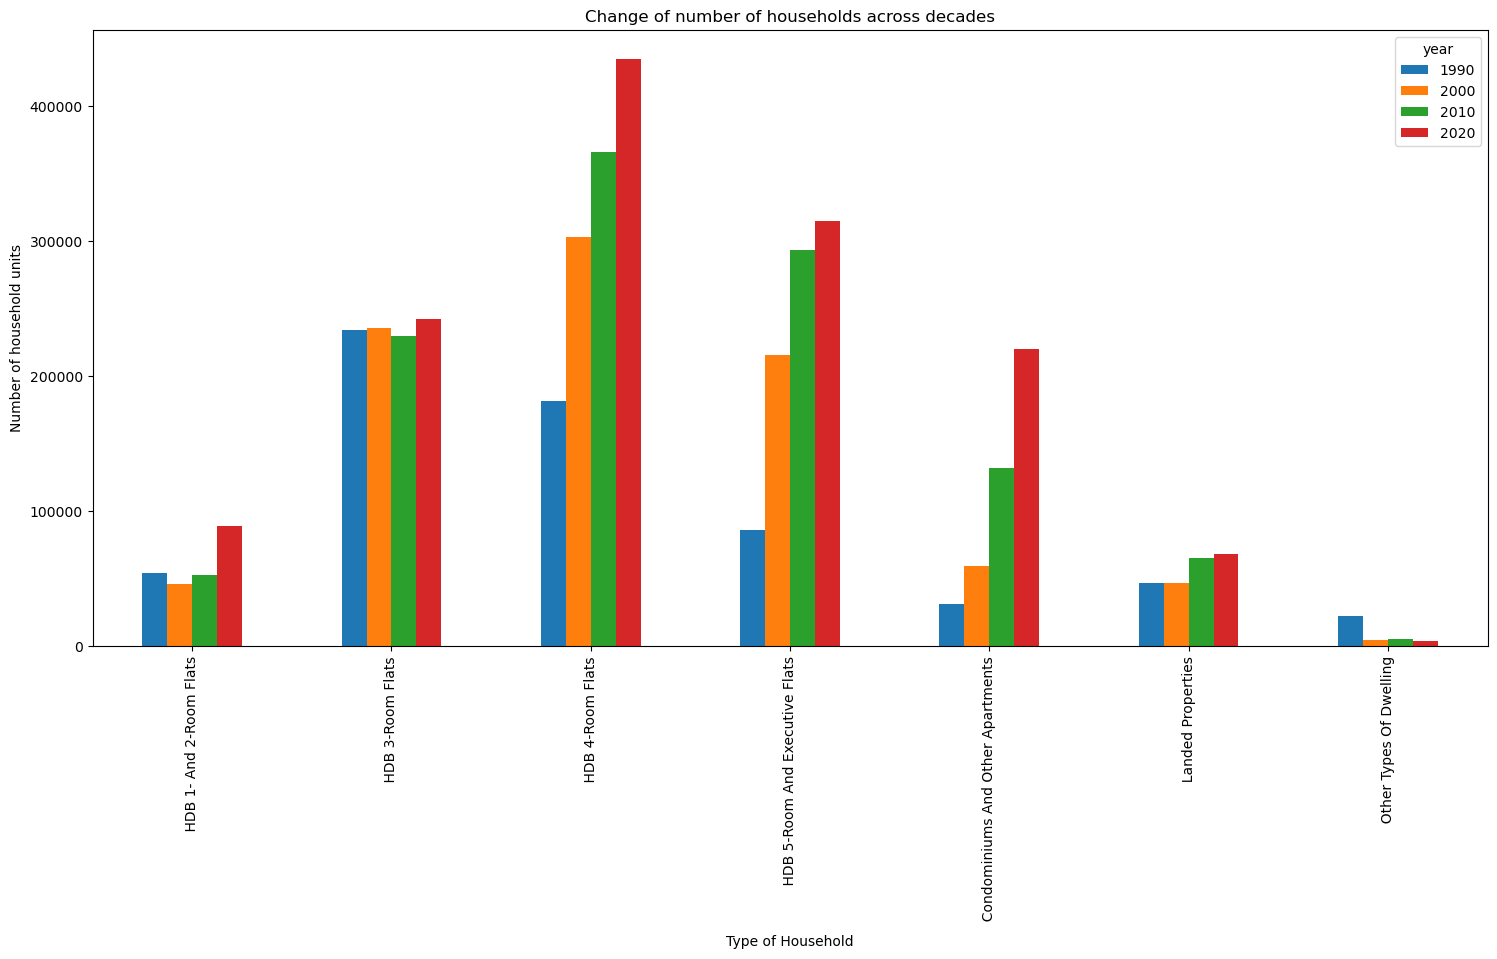

In [6]:
selected_household_type_decade = selected_household_type[selected_household_type["year"].astype(int)%10==0]
pd.pivot_table(selected_household_type_decade,values="noHouseholds",index="Type of Household",columns="year").plot(kind="bar",figsize=(18,8))
plt.title("Change of number of households across decades")
plt.ylabel("Number of household units")
plt.show()

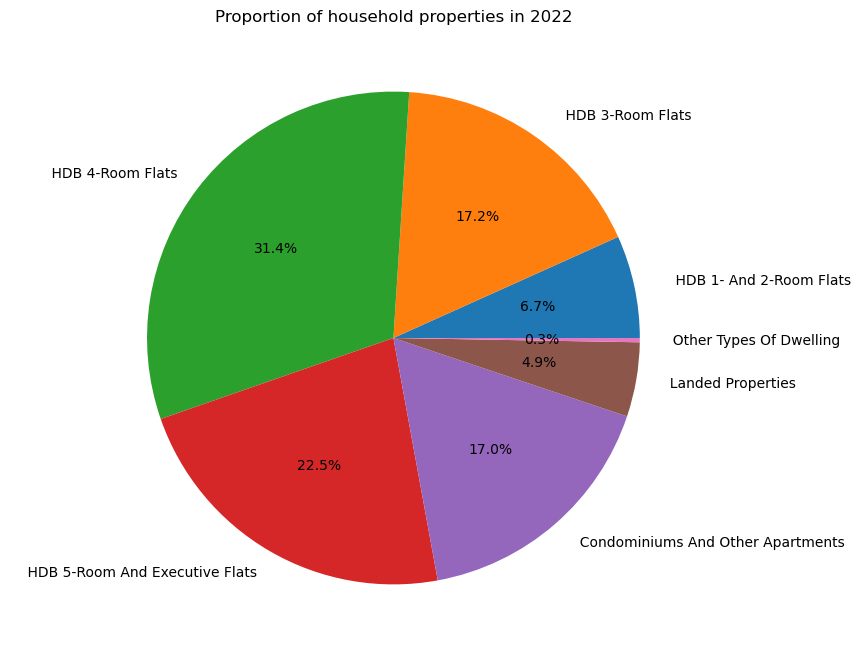

In [7]:
year = str(2022)
labels = household_type['Data Series']
sizes = household_type[year]

plt.figure(figsize=(15,8))
plt.title("Proportion of household properties in "+year)
plt.pie(sizes,labels=labels,autopct='%1.1f%%')
plt.show()

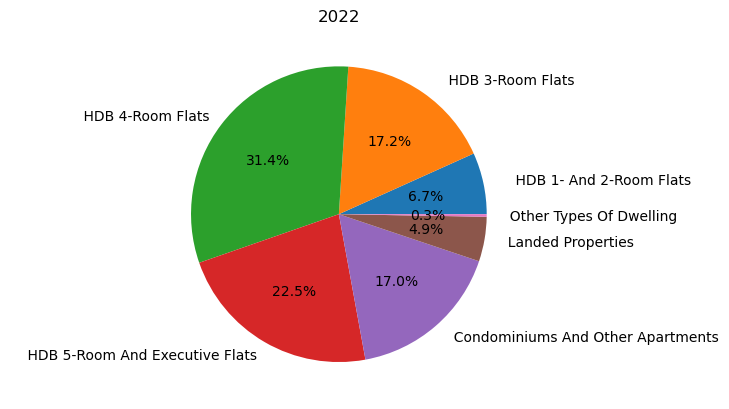

In [8]:
labels = household_type['Data Series']


fig, ax = plt.subplots()

def update(year):
    ax.clear()
    ax.axis('equal')
    str_year = str(year)
    sizes = household_type[str_year]
    ax.pie(sizes,labels=labels,autopct='%1.1f%%')
    ax.set_title(str_year)

ani = FuncAnimation(fig, update, frames=range(1983,2023), repeat=False)
rc('animation', html='html5')
ani

In [9]:
household_occupier_type

,Data Series,Type,2022,2021,2020,2019,2018,2017,2016,2015,...,2007,2006,2005,2004,2003,2002,2001,2000,1995,1990
0,Married Couple-Based With Children,Resident Households,638700,643600,655000,643200,663100,664200,663000,665700,...,621800,611800,604100,598300,588300,591000,582900,569500,518800,439800
1,Married Couple-Based Without Children,Resident Households,248500,247000,228400,261500,229300,219800,209900,188100,...,152100,150500,135800,138800,138700,128500,119000,109800,68400,55300
2,Lone Parent,Resident Households,82400,85300,89800,91100,96100,90500,92800,94000,...,75300,79000,70100,69600,63600,70000,70900,66300,61800,57100
3,Living Alone,Resident Households,217300,217400,220300,208000,185400,167900,156200,146000,...,116400,112500,103300,96300,94800,82700,73200,75400,38100,34600
4,Others,Resident Households,212600,197400,179100,168600,151500,147600,141700,131600,...,109100,100200,111200,100800,103500,92400,88300,94100,81200,75000
5,Married Couple-Based With Children,Household Reference Persons Aged Below 35 Years,45800,43600,42800,43700,43800,48500,46300,44300,...,52100,48700,54800,54400,55200,58100,65500,66800,70500,84400
6,Married Couple-Based Without Children,Household Reference Persons Aged Below 35 Years,31700,33100,33100,36300,34500,30400,34300,28000,...,38000,36900,42000,41000,43700,39800,40300,40900,26600,29200
7,Lone Parent,Household Reference Persons Aged Below 35 Years,3500,3100,3100,2900,2700,2900,2400,2900,...,2900,3100,3100,2300,2400,2600,3800,2700,2800,3200
8,Living Alone,Household Reference Persons Aged Below 35 Years,23800,21600,25000,15900,14100,12300,10500,9200,...,13600,15000,15700,12300,12100,10200,10600,10800,6000,10800
9,Others,Household Reference Persons Aged Below 35 Years,40400,32300,26300,24500,18400,19600,16000,14500,...,21300,18900,22500,21300,22900,19900,20100,18800,17000,22600


In [10]:
household_occupier_type_collapsed = household_occupier_type.melt(id_vars=["Data Series","Type"],
            value_vars=["1990","1995","2000","2001","2002","2003","2004","2005","2006",
                        "2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017","2018","2019",
                        "2020","2021","2022"])
household_occupier_type_collapsed = household_occupier_type_collapsed.rename(columns={"variable":"year","value":"noHouseholds"})
household_occupier_type_selected = household_occupier_type_collapsed[household_occupier_type_collapsed["Type"]=="Resident Households"]
household_occupier_type_selected

,Data Series,Type,year,noHouseholds
0,Married Couple-Based With Children,Resident Households,1990,439800
1,Married Couple-Based Without Children,Resident Households,1990,55300
2,Lone Parent,Resident Households,1990,57100
3,Living Alone,Resident Households,1990,34600
4,Others,Resident Households,1990,75000
...,...,...,...,...
600,Married Couple-Based With Children,Resident Households,2022,638700
601,Married Couple-Based Without Children,Resident Households,2022,248500
602,Lone Parent,Resident Households,2022,82400
603,Living Alone,Resident Households,2022,217300


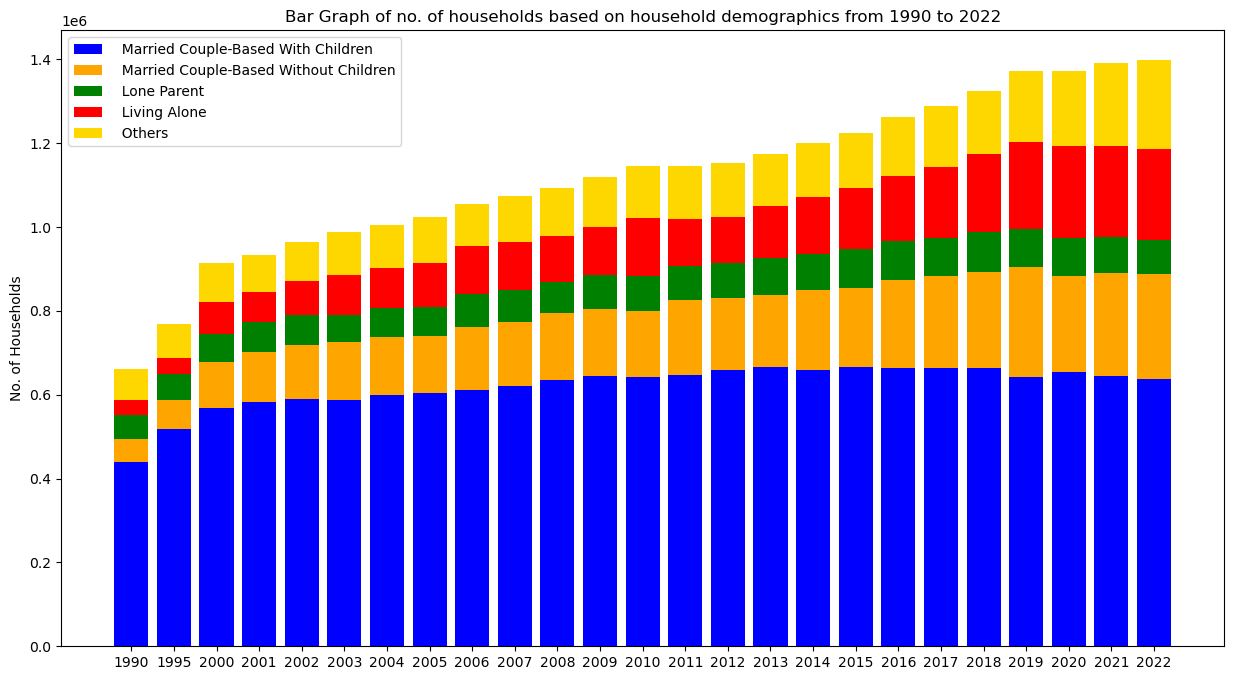

In [11]:
plt.figure(figsize=(15,8))
colors=['b','orange','green','r','gold']
types = household_occupier_type_selected["Data Series"]
bottom = None
for i in range(5):
    data = household_occupier_type_selected[household_occupier_type_selected["Data Series"]==types[i]]
    if (i==0):
        plt.bar(data["year"],data["noHouseholds"],color=colors[i])
        bottom = data["noHouseholds"].to_numpy()
    else:
        plt.bar(data["year"],data["noHouseholds"],bottom=bottom,color=colors[i])
        bottom += data["noHouseholds"].to_numpy()
plt.title("Bar Graph of no. of households based on household demographics from 1990 to 2022")
plt.ylabel("No. of Households")
plt.legend(types)        
plt.show()

In [12]:
household_occupier_type_grouped = household_occupier_type_collapsed.groupby(by=["Type","year"]).sum()
household_occupier_type_grouped = household_occupier_type_grouped.reset_index()
household_occupier_type_grouped = household_occupier_type_grouped[household_occupier_type_grouped["Type"]!="Resident Households"]
household_occupier_type_grouped

,Type,year,noHouseholds
0,Household Reference Persons Aged 35-49 Years,1990,279700
1,Household Reference Persons Aged 35-49 Years,1995,366900
2,Household Reference Persons Aged 35-49 Years,2000,430100
3,Household Reference Persons Aged 35-49 Years,2001,444800
4,Household Reference Persons Aged 35-49 Years,2002,448500
...,...,...,...
95,Household Reference Persons Aged Below 35 Years,2018,113500
96,Household Reference Persons Aged Below 35 Years,2019,123300
97,Household Reference Persons Aged Below 35 Years,2020,130300
98,Household Reference Persons Aged Below 35 Years,2021,133700


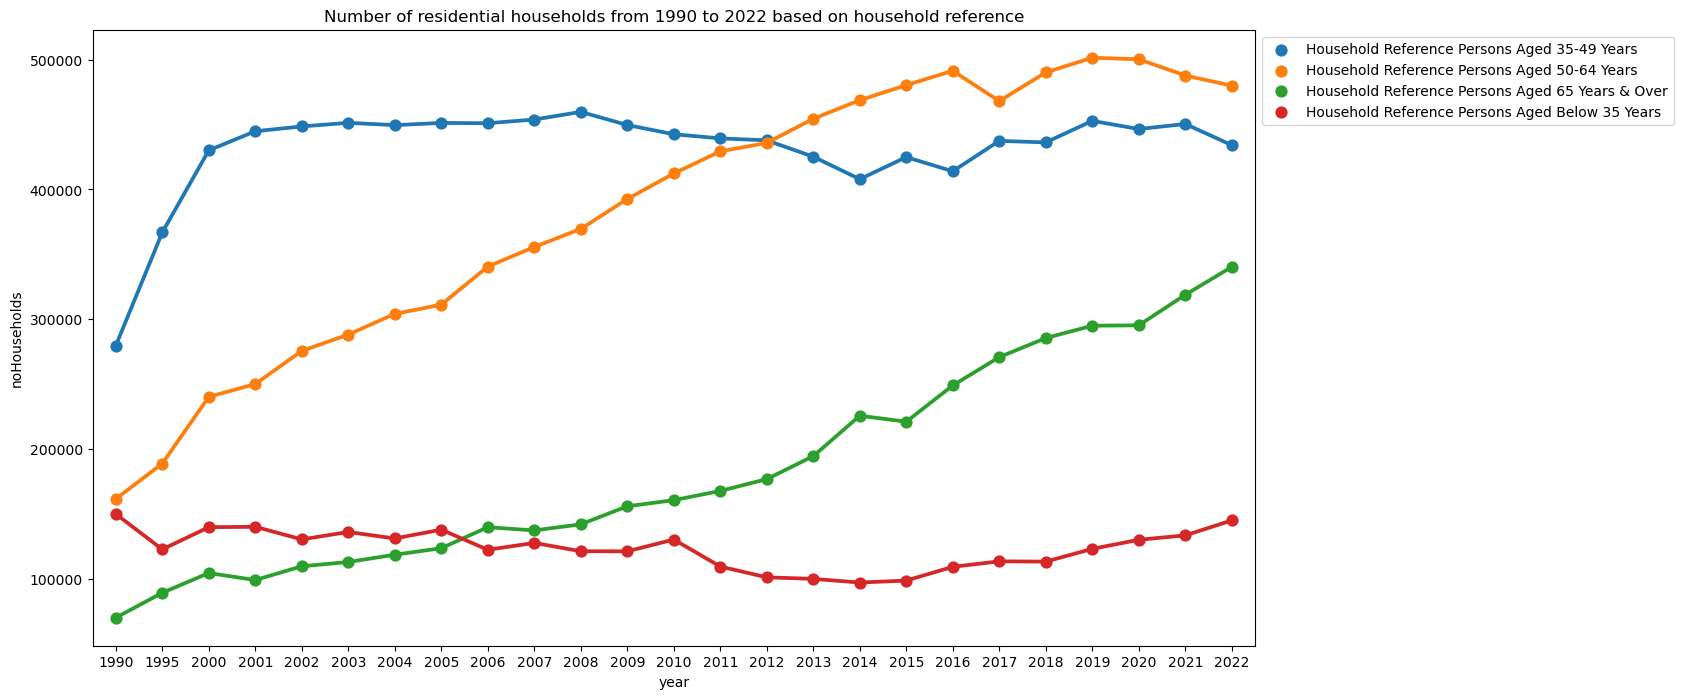

In [13]:
plt.figure(figsize=(15,8))
plt.title("Number of residential households from 1990 to 2022 based on household reference")
sns.pointplot(y="noHouseholds",x="year",data=household_occupier_type_grouped,hue="Type")
plt.legend(bbox_to_anchor=(1,1))
plt.show()

In [14]:
household_occupier_type_demographics = household_occupier_type[household_occupier_type["Type"]!="Resident Households"]
household_occupier_type_demographics = household_occupier_type_demographics.groupby(by="Data Series").sum()
household_occupier_type_demographics = household_occupier_type_demographics.reset_index()
household_occupier_type_demographics

,Data Series,2022,2021,2020,2019,2018,2017,2016,2015,2014,...,2007,2006,2005,2004,2003,2002,2001,2000,1995,1990
0,Living Alone,217300,217400,220300,208100,185500,167900,156300,146000,134800,...,116400,112500,103200,96400,94800,82700,73200,75400,38100,34600
1,Lone Parent,82400,85300,89700,91100,96100,90600,92800,94000,87300,...,75300,79000,70000,69500,63700,70100,71000,66300,61800,57200
2,Married Couple-Based With Children,638700,643600,655000,643300,663000,664200,663100,665600,659800,...,621900,611800,604100,598300,588300,590900,583000,569500,518800,439900
3,Married Couple-Based Without Children,248600,247000,228300,261500,229300,219700,209900,188100,189300,...,152200,150600,135900,138800,138800,128600,119000,109800,68500,55300
4,Others,212600,197400,179100,168600,151500,147600,141800,131600,128600,...,109100,100300,111200,100800,103500,92400,88400,94100,81100,74900


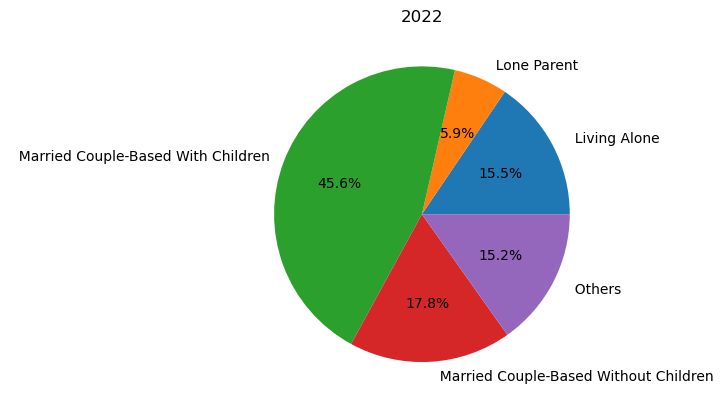

In [15]:
labels = household_occupier_type_demographics['Data Series']

years = ["1990","1995","2000","2001","2002","2003","2004","2005","2006",
                        "2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017","2018","2019",
                        "2020","2021","2022"]
fig, ax = plt.subplots()

def update(index):
    ax.clear()
    ax.axis('equal')
    str_year = str(years[index])
    sizes = household_occupier_type_demographics[str_year]
    ax.pie(sizes,labels=labels,autopct='%1.1f%%')
    ax.set_title(str_year)

ani = FuncAnimation(fig, update, frames=range(25), repeat=False)
rc('animation', html='html5')
ani

In [16]:
household_occupier_type_demographics = household_occupier_type.groupby(by="Type").sum()
household_occupier_type_demographics = household_occupier_type_demographics.rename(index=
    {"Household Reference Persons Aged 35-49 Years":"35 - 45 years","Household Reference Persons Aged 50-64 Years": "50 - 64 years",
    "Household Reference Persons Aged 65 Years & Over":">=65 years","Household Reference Persons Aged Below 35 Years":"<35 years"})
household_occupier_type_demographics = household_occupier_type_demographics.reset_index()
household_occupier_type_demographics = household_occupier_type_demographics[household_occupier_type_demographics["Type"]!="Resident Households"]

household_occupier_type_demographics

,Type,2022,2021,2020,2019,2018,2017,2016,2015,2014,...,2007,2006,2005,2004,2003,2002,2001,2000,1995,1990
0,35 - 45 years,434100,450400,446500,452800,436200,437400,414000,424900,407900,...,453800,451000,451200,449500,451300,448500,444800,430100,366900,279700
1,50 - 64 years,479900,487700,500200,501400,490100,468000,491300,480300,468700,...,355700,340600,311300,304200,288300,275700,250200,240300,189000,161700
2,>=65 years,340400,318900,295400,295100,285600,270900,249100,221200,225800,...,137500,140000,123800,118800,113200,109900,99300,104700,89500,70300
3,<35 years,145200,133700,130300,123300,113500,113700,109500,98900,97400,...,127900,122600,138100,131300,136300,130600,140300,140000,122900,150200


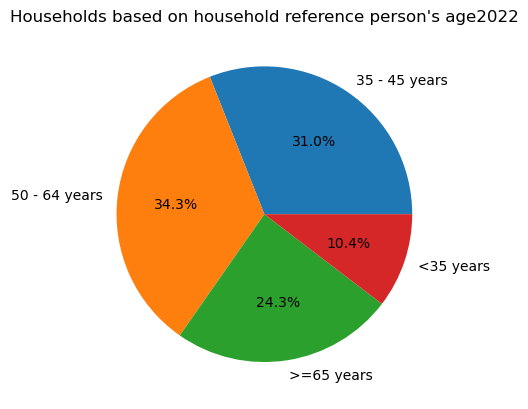

In [17]:
labels = household_occupier_type_demographics['Type']

years = ["1990","1995","2000","2001","2002","2003","2004","2005","2006",
                        "2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017","2018","2019",
                        "2020","2021","2022"]
fig, ax = plt.subplots()

def update(index):
    ax.clear()
    ax.axis('equal')
    str_year = str(years[index])
    sizes = household_occupier_type_demographics[str_year]
    ax.pie(sizes,labels=labels,autopct='%1.1f%%')
    ax.set_title("Households based on household reference person's age"+str_year)
    
ani = FuncAnimation(fig, update, frames=range(25), repeat=False)
rc('animation', html='html5')
ani

In [18]:
household_size_selected = household_size.drop(columns=["1980"])
household_size_selected = household_size_selected.melt(id_vars=["Data Series"],
            value_vars=[str(i) for i in range(1983,2023)])
household_size_selected = household_size_selected[household_size_selected["Data Series"].str.endswith("(Persons)")]
household_size_selected = household_size_selected.rename(columns={"variable":"year"})
household_size_selected

,Data Series,year,value
7,Average Household Size Among Resident Househol...,1983,4.79
8,Total HDB Dwellings (Persons),1983,4.73
9,HDB 1- And 2-Room Flats (Persons),1983,4.05
10,HDB 3-Room Flats (Persons),1983,4.92
11,HDB 4-Room Flats (Persons),1983,5.37
...,...,...,...
635,HDB 4-Room Flats (Persons),2022,3.15
636,HDB 5-Room And Executive Flats (Persons),2022,3.56
637,Condominiums And Other Apartments (Persons),2022,3.11
638,Landed Properties (Persons),2022,4.12


In [29]:
household_size_selected = household_size_selected[household_size_selected["Data Series"]!="  Total HDB Dwellings (Persons)"]
household_size_selected

,Data Series,year,value
7,Average Household Size Among Resident Househol...,1983,4.79
9,HDB 1- And 2-Room Flats (Persons),1983,4.05
10,HDB 3-Room Flats (Persons),1983,4.92
11,HDB 4-Room Flats (Persons),1983,5.37
12,HDB 5-Room And Executive Flats (Persons),1983,4.69
...,...,...,...
635,HDB 4-Room Flats (Persons),2022,3.15
636,HDB 5-Room And Executive Flats (Persons),2022,3.56
637,Condominiums And Other Apartments (Persons),2022,3.11
638,Landed Properties (Persons),2022,4.12


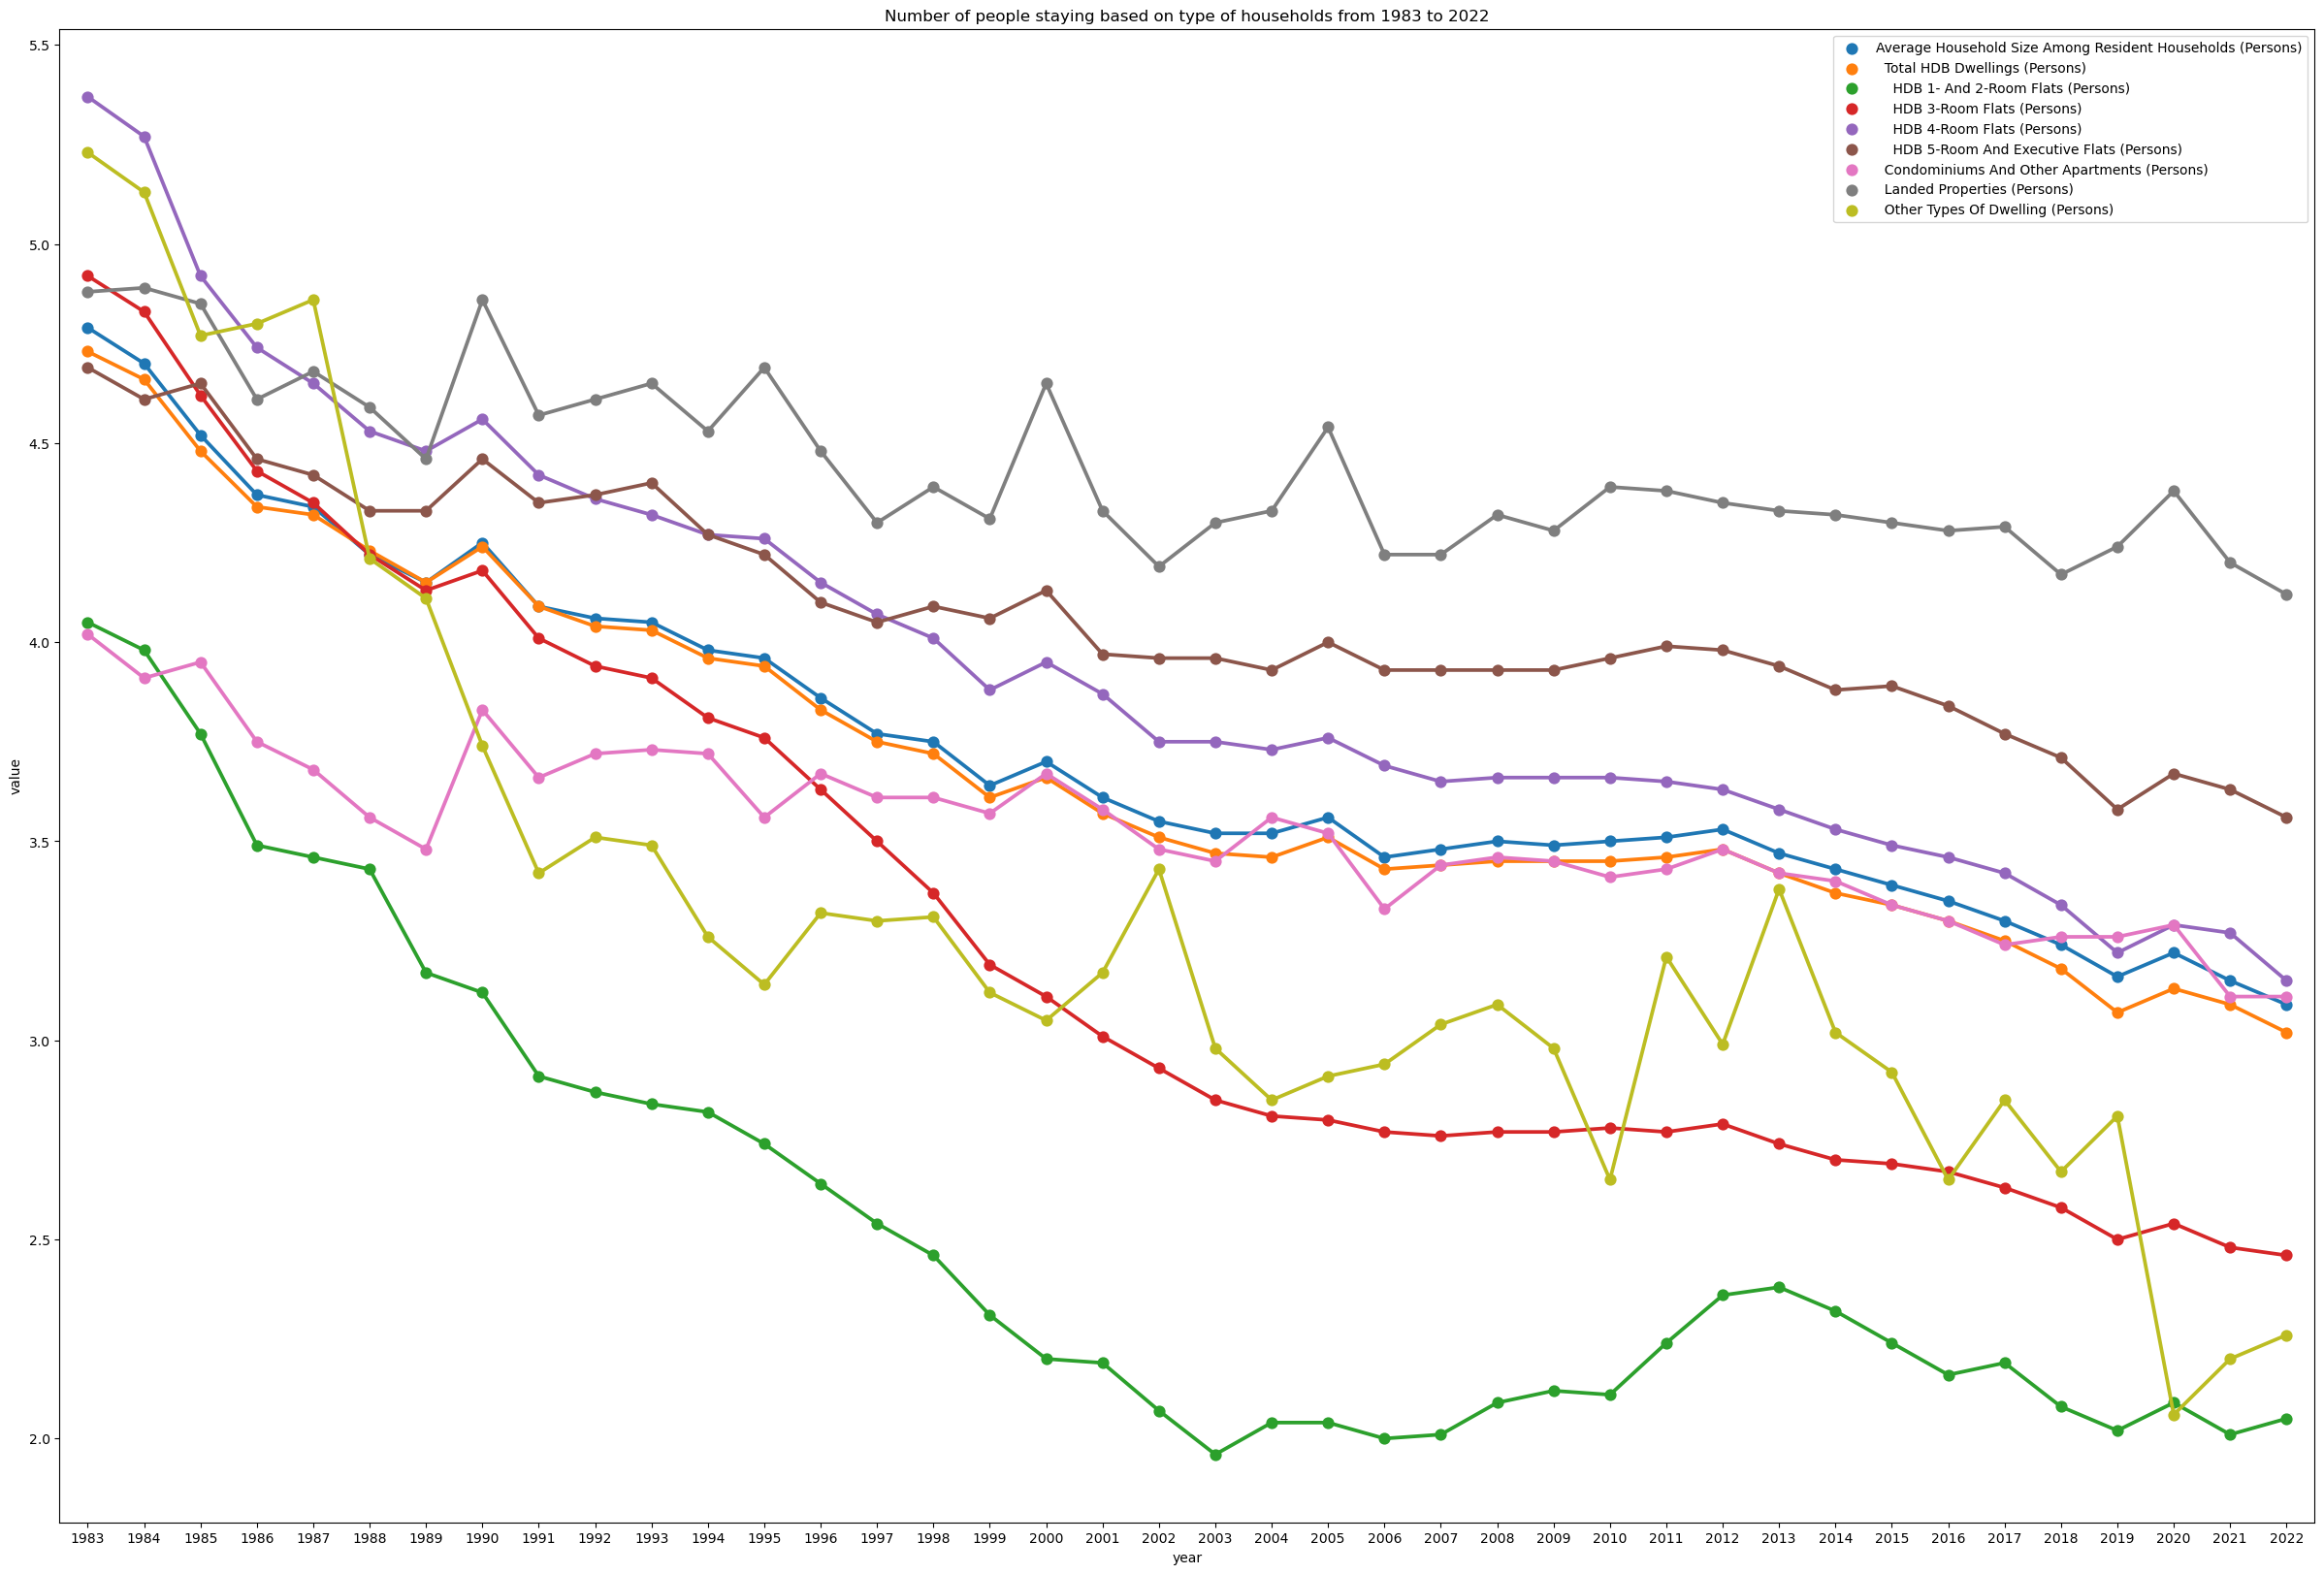

In [20]:
plt.figure(figsize=(30,20))
plt.title("Number of people staying based on type of households from 1983 to 2022")
sns.pointplot(y="value",x="year",data=household_size_selected,hue="Data Series")
plt.legend(bbox_to_anchor=(1,1))
plt.show()

In [21]:
household_type_tenancy_selected = household_type_tenancy.drop(index=[0,1,2,3,4])
household_type_tenancy_selected

,Data Series,2022,2021,2020,2019,2018,2017,2016,2015,2014,...,2006,2005,2004,2003,2002,2001,2000,1995,1990,1980
3,Proportion Of Owner-Occupied Resident Househol...,89.3,88.9,87.9,90.4,91.0,90.7,90.9,90.8,90.3,...,90.3,91.1,92.5,92.3,93.1,93.1,92.0,90.0,87.5,58.8
4,Total HDB Dwellings (Per Cent),90.9,90.9,89.2,91.9,92.2,92.1,92.2,92.0,91.6,...,92.2,93.0,94.2,93.4,94.1,94.0,93.1,90.6,89.8,61.5
5,HDB 1- And 2-Room Flats (Per Cent),40.6,39.9,37.8,39.1,39.8,36.7,35.9,33.9,23.9,...,19.6,23.8,34.4,25.2,25.5,20.8,19.3,17.5,26.8,5.2
6,HDB 3-Room Flats (Per Cent),93.8,93.5,92.7,94.5,95.3,94.4,94.2,94.8,94.4,...,93.7,94.4,95.9,95.0,96.3,96.8,96.1,96.0,95.2,84.8
7,HDB 4-Room Flats (Per Cent),95.9,96.1,94.0,97.2,97.1,97.3,97.5,96.8,96.8,...,97.2,97.3,97.7,97.8,98.2,98.2,98.0,98.1,97.6,96.2
8,HDB 5-Room And Executive Flats (Per Cent),96.8,96.6,94.5,97.1,97.1,97.3,97.4,97.2,97.4,...,97.4,97.9,98.2,98.5,98.5,98.7,98.5,98.2,97.8,98.8
9,Condominiums & Other Apartments (Per Cent),81.9,80.3,81.6,83.1,84.9,83.6,84.1,84.1,83.3,...,77.1,77.2,80.8,80.9,82.6,82.6,80.8,83.3,78.0,49.2
10,Landed Properties (Per Cent),90.7,89.7,89.2,91.5,92.8,92.0,92.8,92.0,90.9,...,90.1,89.8,91.1,92.2,92.8,95.0,89.8,92.3,87.6,75.4
11,Other Types Of Dwelling (Per Cent),59.7,44.8,43.4,31.6,58.4,57.1,51.5,54.9,47.1,...,62.4,57.1,65.2,81.7,74.1,64.0,56.1,50.1,41.3,44.5


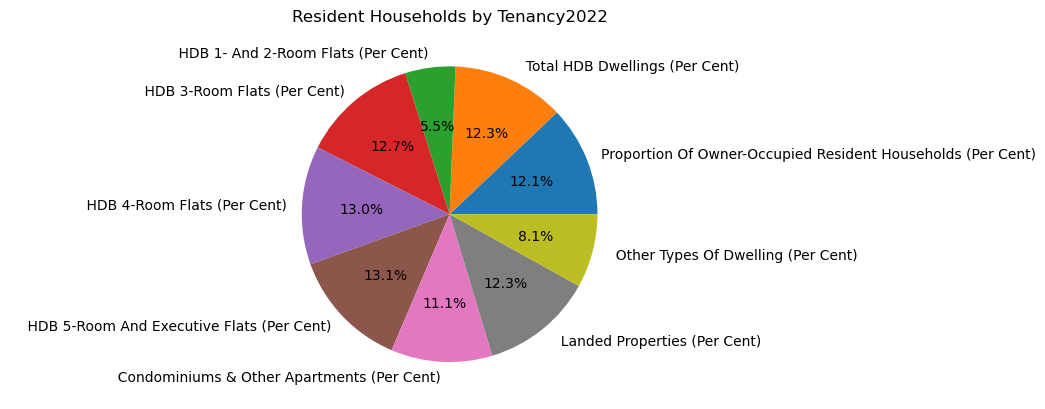

In [22]:
labels = household_type_tenancy_selected['Data Series']

years = ["1990","1995","2000","2001","2002","2003","2004","2005","2006",
                        "2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017","2018","2019",
                        "2020","2021","2022"]
fig, ax = plt.subplots()

def update(index):
    ax.clear()
    ax.axis('equal')
    str_year = str(years[index])
    sizes = household_type_tenancy_selected[str_year]
    ax.pie(sizes,labels=labels,autopct='%1.1f%%')
    ax.set_title("Resident Households by Tenancy"+str_year)
    
ani = FuncAnimation(fig, update, frames=range(25), repeat=False)
rc('animation', html='html5')
ani

In [23]:
years = ["1990","1995","2000","2001","2002","2003","2004","2005","2006",
                        "2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017","2018","2019",
                        "2020","2021","2022"]
household_child_selected = household_child.groupby(by="Type").sum()
household_child_selected = household_child_selected.reset_index()
household_child_selected = household_child_selected.melt(id_vars=["Type"],
            value_vars=years)
household_child_selected = household_child_selected.rename(columns={"variable":"year"})
household_child_selected

,Type,year,value
0,Living Alone,1990,34600
1,Lone Parent,1990,56500
2,Married Couple-Based With Children,1990,437600
3,Married Couple-Based Without Children,1990,55300
4,Others,1990,75000
...,...,...,...
120,Living Alone,2022,217300
121,Lone Parent,2022,82400
122,Married Couple-Based With Children,2022,638700
123,Married Couple-Based Without Children,2022,248500


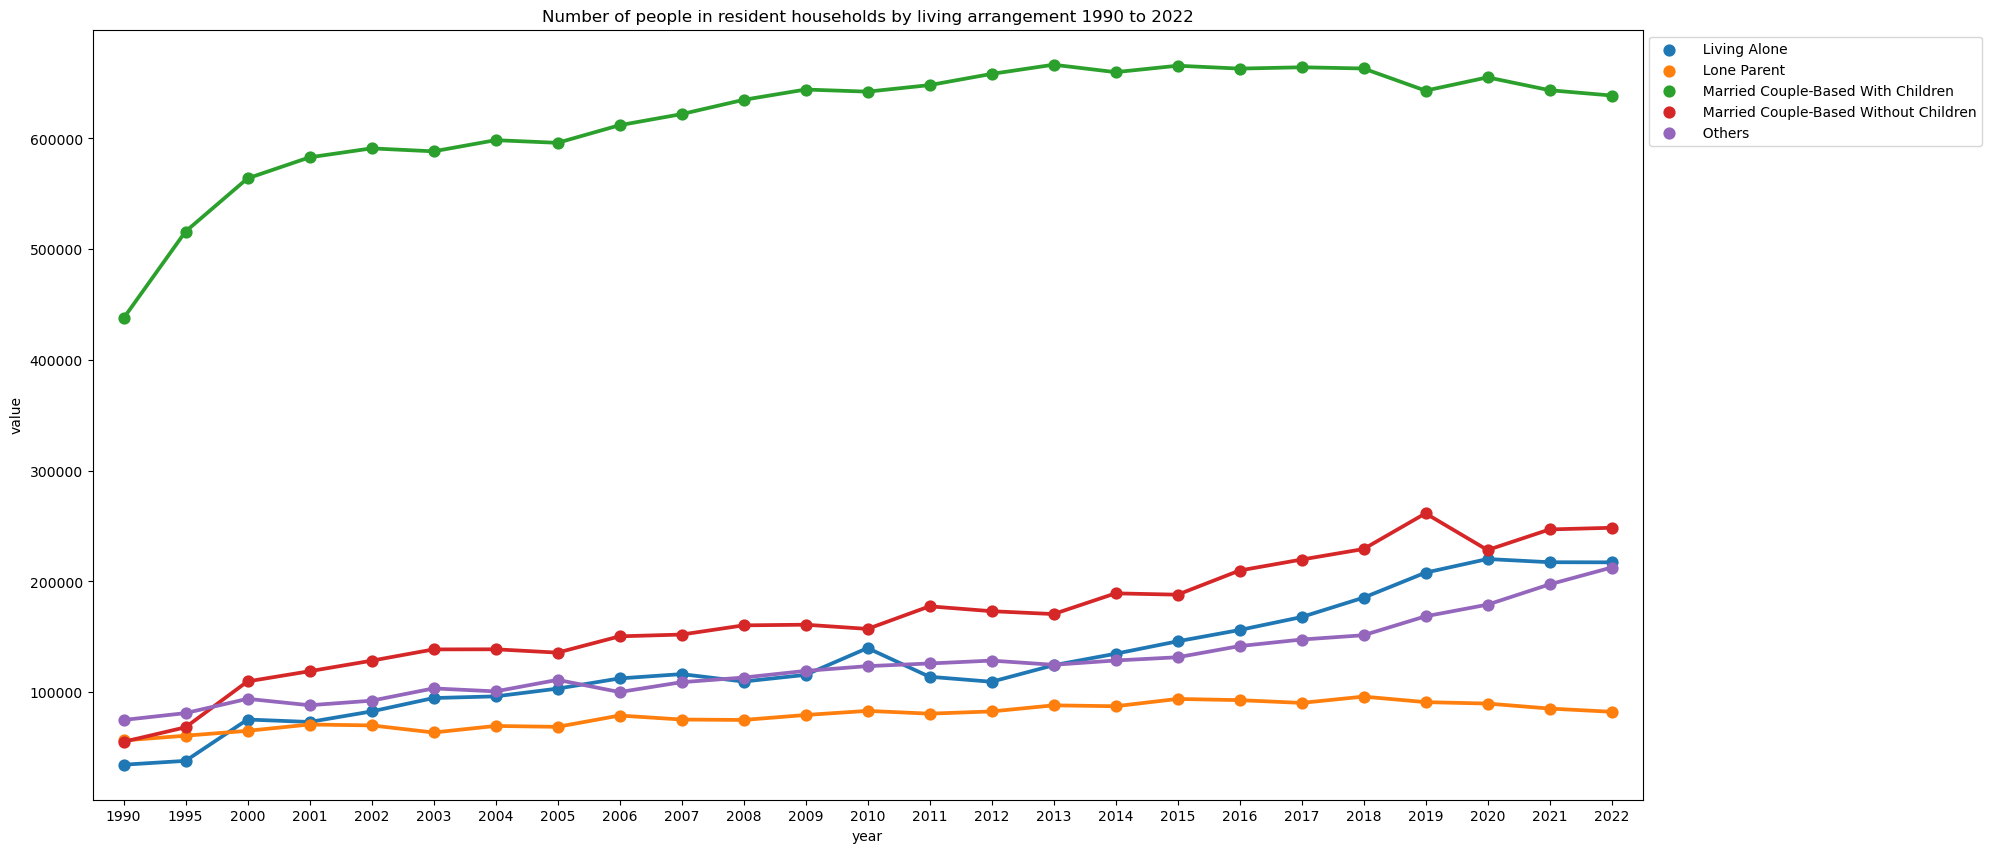

In [24]:
plt.figure(figsize=(20,10))
plt.title("Number of people in resident households by living arrangement 1990 to 2022")
sns.pointplot(y="value",x="year",data=household_child_selected,hue="Type")
plt.legend(bbox_to_anchor=(1,1))
plt.show()

In [25]:
household_child_with_child_married = household_child[household_child["Type"]=="  Married Couple-Based With Children"]
household_child_with_child_married = household_child_with_child_married.set_index("Data Series")
household_child_with_child_married = household_child_with_child_married.rename(
    index={"    With Youngest Child Aged Below 6 Years":"<6 years","    With Youngest Child Aged 6 - 11 Years":"6 - 11 years",
          "    With Youngest Child Aged 12 - 15 Years":"12 - 15 years","    With Youngest Child Aged 16 Years And Over":">=16 years"})
household_child_with_child_married = household_child_with_child_married.reset_index()
household_child_with_child_married

,Data Series,Type,2022,2021,2020,2019,2018,2017,2016,2015,...,2007,2006,2005,2004,2003,2002,2001,2000,1995,1990
0,<6 years,Married Couple-Based With Children,130200,147500,153300,152100,157500,161600,157800,154000,...,156200,157000,166100,166500,169100,181300,191300,183100,179700,160200
1,6 - 11 years,Married Couple-Based With Children,102300,111300,115500,116900,119500,121500,111800,117400,...,142100,138100,135900,140100,138700,135300,133000,131900,100400,92100
2,12 - 15 years,Married Couple-Based With Children,67900,69800,69500,70400,71500,72700,76700,84100,...,88800,87500,79700,83100,83500,76700,69300,60000,61700,53300
3,>=16 years,Married Couple-Based With Children,338300,314900,316800,303700,314600,308400,316700,310100,...,234800,229300,214300,208700,197000,197700,189300,188900,174100,132000


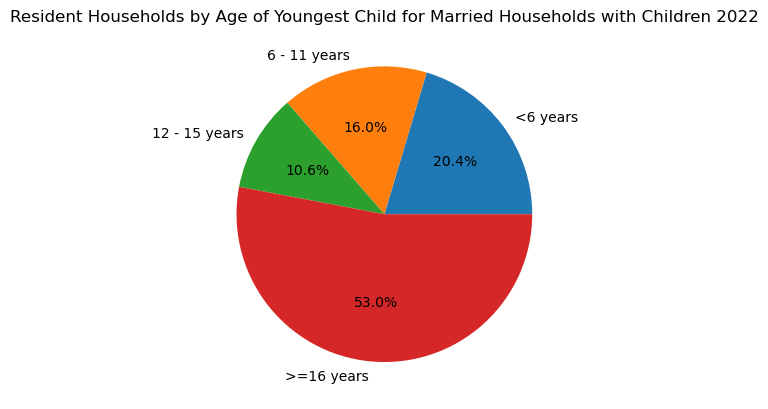

In [26]:
labels = household_child_with_child_married['Data Series']

years = ["1990","1995","2000","2001","2002","2003","2004","2005","2006",
                        "2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017","2018","2019",
                        "2020","2021","2022"]
fig, ax = plt.subplots()

def update(index):
    ax.clear()
    ax.axis('equal')
    str_year = str(years[index])
    sizes = household_child_with_child_married[str_year]
    ax.pie(sizes,labels=labels,autopct='%1.1f%%')
    ax.set_title("Resident Households by Age of Youngest Child for Married Households with Children "+str_year)
    
ani = FuncAnimation(fig, update, frames=range(25), repeat=False)
rc('animation', html='html5')
ani